In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA

print("Библиотеки успешно импортированы")

Библиотеки успешно импортированы


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving iris.csv to iris.csv


In [ ]:
df = pd.read_csv('iris.csv')
print("Первые 5 строк данных:")
print(df.head())
print("\nИнформация о данных:")
print(df.info())
print("\nСтатистика данных:")
print(df.describe())

Первые 5 строк данных:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

Статистика данных:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000

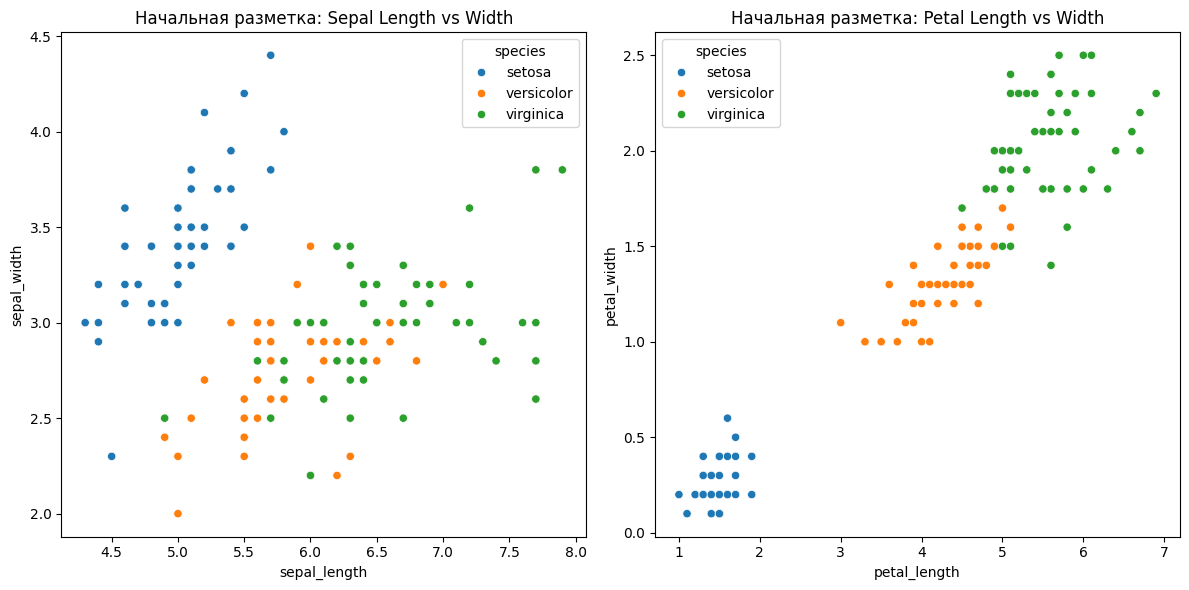

In [ ]:
# Начальная разметка
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=df)
plt.title('Начальная разметка: Sepal Length vs Width')

plt.subplot(1, 2, 2)
sns.scatterplot(x='petal_length', y='petal_width', hue='species', data=df)
plt.title('Начальная разметка: Petal Length vs Width')

plt.tight_layout()
plt.show()

In [ ]:
# Преобразование данных в числовые виды
le = LabelEncoder()
df['species_encoded'] = le.fit_transform(df['species'])

print("Данные после кодирования меток:")
print(df[['species', 'species_encoded']].drop_duplicates())
print("\nПервые 5 строк с закодированными метками:")
print(df.head())

Данные после кодирования меток:
        species  species_encoded
0        setosa                0
50   versicolor                1
100   virginica                2

Первые 5 строк с закодированными метками:
   sepal_length  sepal_width  petal_length  petal_width species  \
0           5.1          3.5           1.4          0.2  setosa   
1           4.9          3.0           1.4          0.2  setosa   
2           4.7          3.2           1.3          0.2  setosa   
3           4.6          3.1           1.5          0.2  setosa   
4           5.0          3.6           1.4          0.2  setosa   

   species_encoded  
0                0  
1                0  
2                0  
3                0  
4                0  


In [ ]:
#Разделение на тестовую и основную
X = df.drop(['species', 'species_encoded'], axis=1)
y = df['species_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Размеры выборок:")
print(f"Обучающая: X - {X_train.shape}, y - {y_train.shape}")
print(f"Тестовая: X - {X_test.shape}, y - {y_test.shape}")

Размеры выборок:
Обучающая: X - (105, 4), y - (105,)
Тестовая: X - (45, 4), y - (45,)


In [ ]:
# Обучение
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

print("Модель Random Forest успешно обучена")

Модель Random Forest успешно обучена


In [ ]:
# Предсказание, оценка
y_pred = model.predict(X_test)

print("Метрики классификации:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

print("\nМатрица ошибок:")
print(confusion_matrix(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"\nТочность модели: {accuracy:.4f}")

Метрики классификации:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Матрица ошибок:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Точность модели: 1.0000


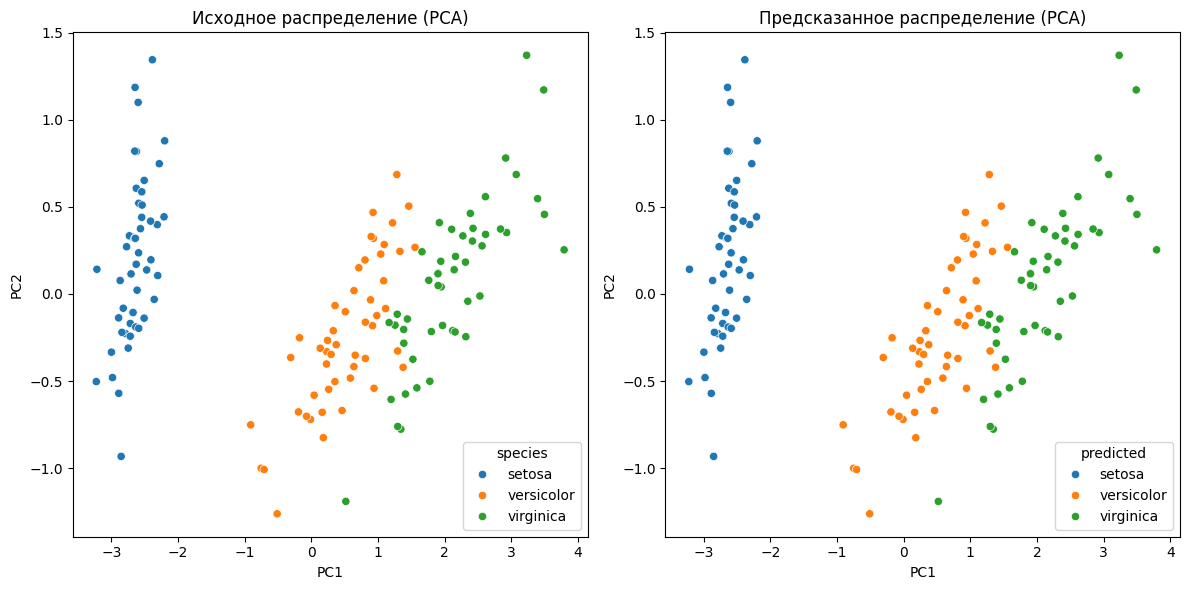

In [ ]:
# Визуализация распределения
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['species'] = df['species']
df_pca['predicted'] = le.inverse_transform(model.predict(X))

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='PC1', y='PC2', hue='species', data=df_pca)
plt.title('Исходное распределение (PCA)')

plt.subplot(1, 2, 2)
sns.scatterplot(x='PC1', y='PC2', hue='predicted', data=df_pca)
plt.title('Предсказанное распределение (PCA)')

plt.tight_layout()
plt.show()

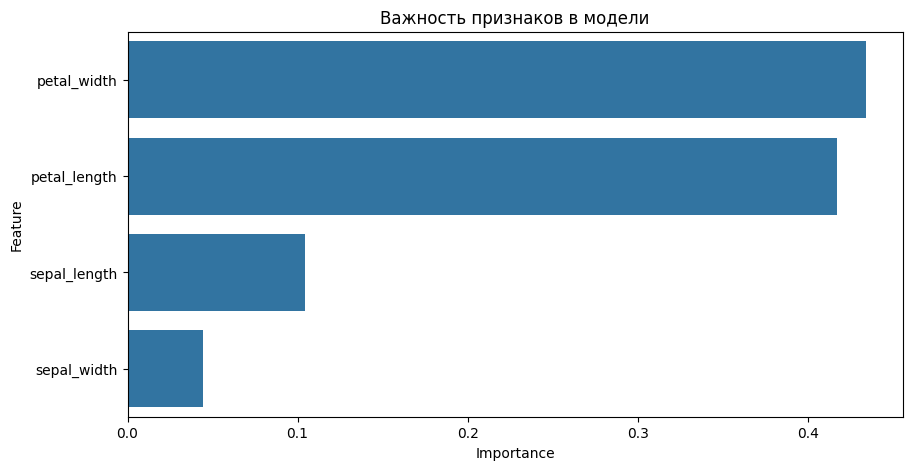

Важность признаков:
        Feature  Importance
3   petal_width    0.433982
2  petal_length    0.417308
0  sepal_length    0.104105
1   sepal_width    0.044605


In [ ]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Важность признаков в модели')
plt.show()

print("Важность признаков:")
print(feature_importance)